### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv('USvideos.csv')
df.head()

### EDA

In [ ]:
df.shape

In [ ]:
#drop duplicates
df = df.drop_duplicates()

In [ ]:
df.shape

In [ ]:
df.describe()# returns summary statistics

In [ ]:
df.info()

In [ ]:
columns_to_remove = ['thumbnail_link','description']
df = df.drop(columns=columns_to_remove)
df.info()

In [ ]:
import datetime
df.trending_date=df.trending_date.apply(lambda x: datetime.datetime.strptime(x, '%y.%d.%m'))
df.head(3)


In [ ]:
df.publish_time = pd.to_datetime(df.publish_time)
df.head(2)

In [ ]:
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour
df.head(2)

In [ ]:
print(sorted(df['category_id'].unique()))

In [ ]:
df['category_name']=np.nan
df.loc[(df['category_id']==1),'category_name'] = 'File and Animation'
df.loc[(df['category_id']==2),'category_name'] = 'Autos and Vehicles'
df.loc[(df['category_id']==10),'category_name'] = 'Music'
df.loc[(df['category_id']==15),'category_name'] = 'Pets and Animals'
df.loc[(df['category_id']==17),'category_name'] = 'Sports'
df.loc[(df['category_id']==19),'category_name'] = 'Travel and Events'
df.loc[(df['category_id']==20),'category_name'] = 'Gaming'
df.loc[(df['category_id']==22),'category_name'] = 'People and Blogs'
df.loc[(df['category_id']==23),'category_name'] = 'Comedy'
df.loc[(df['category_id']==24),'category_name'] = 'Entertainment'
df.loc[(df['category_id']==25),'category_name'] = 'News and Politics'
df.loc[(df['category_id']==26),'category_name'] = 'How to and style'
df.loc[(df['category_id']==27),'category_name'] = 'Education'
df.loc[(df['category_id']==28),'category_name'] = 'Science and Technology'
df.loc[(df['category_id']==29),'category_name'] = 'Non Profits and Activities'
df.loc[(df['category_id']==30),'category_name'] = 'Movies'
df.loc[(df['category_id']==43),'category_name'] = 'Shows'

df.head()



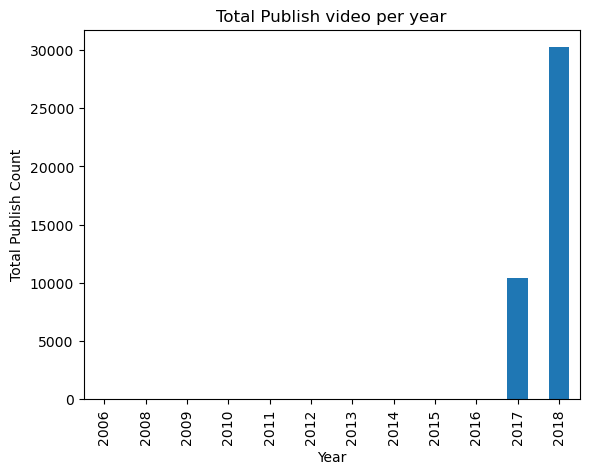

In [42]:
df['year'] =df['publish_time'].dt.year
yearly_counts = df.groupby('year')['video_id'].count()

#create a bar chart
yearly_counts.plot(kind='bar',xlabel='Year',ylabel = 'Total Publish Count',title='Total Publish video per year')

# show the chart
plt.show()

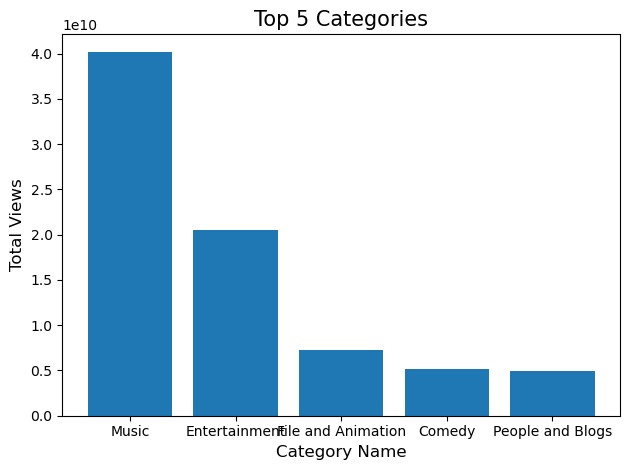

In [43]:
# Group the data by 'category name' and calculate the sum of 'views' in each category
category_views = df.groupby('category_name')['views'].sum().reset_index()

#start teh categories by views in descending order
top_categories = category_views.sort_values(by='views',ascending=False).head(5)

#create a bar plot to visualize the top 5 categories
plt.bar(top_categories['category_name'],top_categories['views'])
plt.xlabel('Category Name',fontsize=12)
plt.ylabel('Total Views',fontsize=12)
plt.title('Top 5 Categories',fontsize=15)
plt.tight_layout()
plt.show()

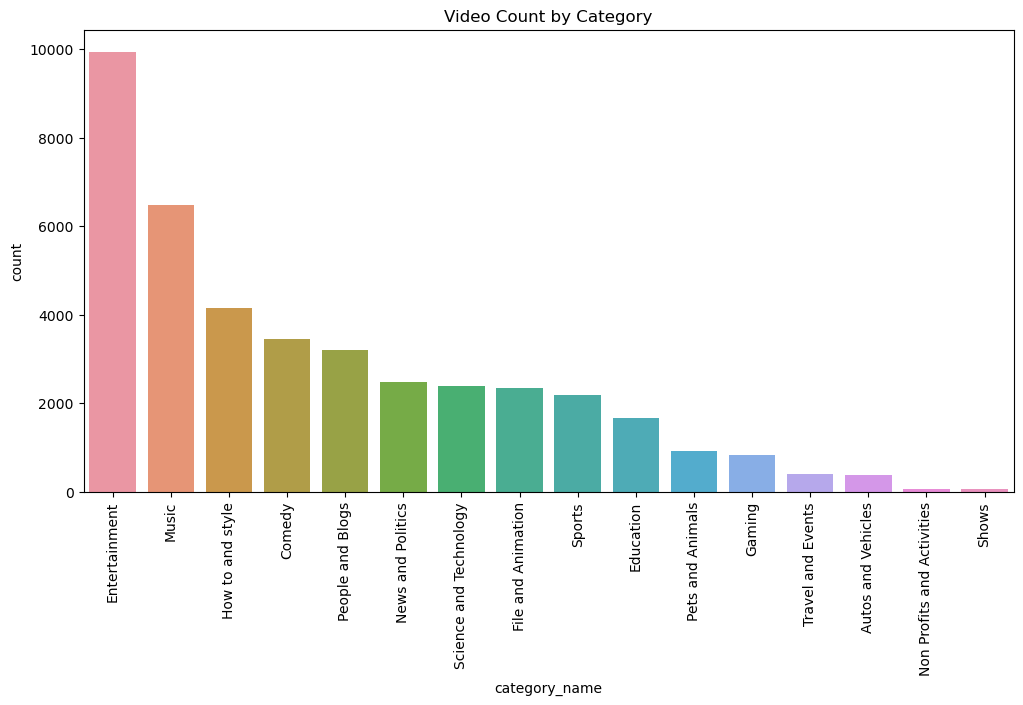

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='category_name',data =df,order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Video Count by Category')
plt.show()

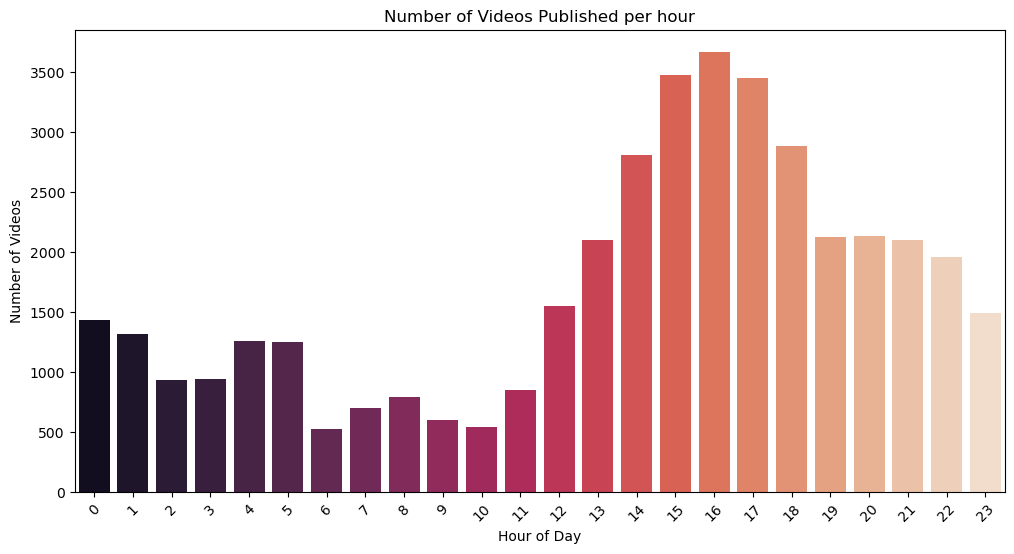

In [45]:
# count the number of videos published per hour
videos_per_hour =df['publish_hour'].value_counts().sort_index()

#create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=videos_per_hour.index,y=videos_per_hour.values,palette='rocket')
plt.title('Number of Videos Published per hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['publish_time']= pd.to_datetime(df['publish_time'])
df['publish_date']=df['publish_time'].dt.date
video_count_by_date=df.groupby('publish_date').size()
plt.figure(figsize=(12,6))
sns.lineplot(data=video_count_by_date)
plt.title('videos published over time')
plt.xlabel('Published Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Scatter plot between 'views' and 'likes'
sns.scatterplot(data=df, x= 'views',y='likes')
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)
plt.subplot(2,2,1)
g= sns.countplot(x='comments_disabled',data=df)
g.set_title('comments disabled',fontsize=16)
plt.subplot(2,2,2)
g1 =sns.countplot(x='ratings_disabled',data=df)
g1.set_title('Ratings disabled',fontsize=16)
plt.subplot(2,2,3)
g2=sns.countplot(x='video_error_or_removed',data=df)
g2.set_title('video error or removed',fontsize=16)
plt.show()

In [ ]:
corr_matrix=df['views'].corr(df['likes'])
corr_matrix